In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
df = pd.read_csv('data.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,slope,fuel_consumption
0,-15.00,6.87
1,-14.70,8.76
2,-14.39,9.74
3,-14.09,10.71
4,-13.79,11.26
...,...,...
95,13.79,116.45
96,14.09,122.54
97,14.39,128.73
98,14.70,134.82


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   slope             100 non-null    float64
 1   fuel_consumption  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [106]:
df.describe()

,slope,fuel_consumption
count,1.000000e+02,100.00000
mean,2.486900e-16,29.92490
std,8.791271e+00,33.51198
min,-1.500000e+01,6.69000
25%,-7.497500e+00,9.94000
50%,0.000000e+00,15.53000
75%,7.497500e+00,32.54000
max,1.500000e+01,141.61000


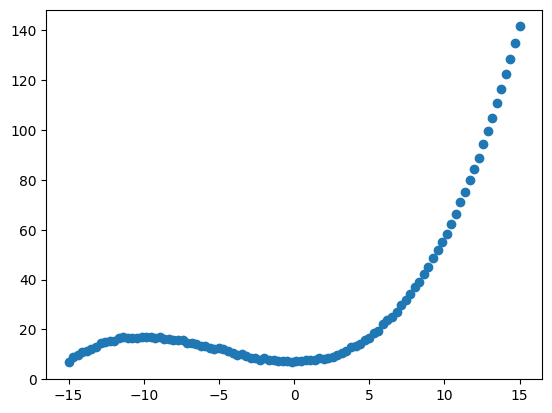

In [107]:
plt.scatter(df['slope'], df['fuel_consumption'])

In [108]:
x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=2)

In [110]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 35 to 40
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   slope   80 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [112]:
from sklearn.metrics import r2_score

In [113]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [114]:
x_poly = poly.fit_transform(x)

In [115]:
model.fit(x_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [116]:
y_pred = model.predict(x_poly)

In [117]:
r2_score(y, y_pred)

0.9999211539873949

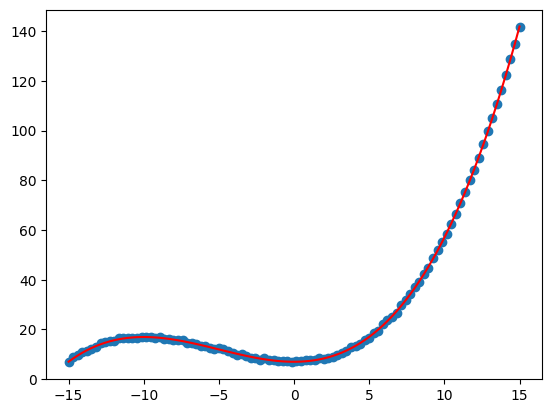

In [118]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

In [119]:
from joblib import dump

In [120]:
dump(model, 'model.joblib')

['model.joblib']

In [121]:
model.n_features_in_

4

In [122]:
model.predict(poly.fit_transform([[0.5]]))

array([7.05737611])